 # Customer Segmentacion: Unsupervised Machine Learning

The aim of the project is to perform customer segmentation analysis using a dataset from a retail store. 

Customer segmentation is a common technique to group customers in different segments based on similar characteristics. In order to do this will use a dataset of 2240 rows and 29 columns from the website kaggle (source: https://www.kaggle.com/imakash3011/customer-personality-analysis). 
The variables and their description are provided below:

**ID**: Customer's unique identifier <br>
**Year_Birth**: Customer's birth year <br>
**Education**: Customer's education level <br>
**Marital_Status**: Customer's marital status <br>
**Income**: Customer's yearly household income<br>
**Kidhome**: Number of children in customer's household <br>
**Teenhome**: Number of teenagers in customer's household <br>
**Dt_Customer**: Date of customer's enrollment with the company <br>
**Recency**: Number of days since customer's last purchase<br>
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise<br>

**MntWines**: Amount spent on wine in last 2 years<br>
**MntFruits**: Amount spent on fruits in last 2 years <br>
**MntMeatProducts**: Amount spent on meat in last 2 years <br>
**MntFishProducts**: Amount spent on fish in last 2 years<br>
**MntSweetProducts**: Amount spent on sweets in last 2 years <br>
**MntGoldProds**: Amount spent on gold in last 2 years<br>

**NumDealsPurchases**: Number of purchases made with a discount <br>
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

**NumWebPurchases**: Number of purchases made through the company’s website <br>
**NumCatalogPurchases**: Number of purchases made using a catalogue <br>
**NumStorePurchases**: Number of purchases made directly in stores <br>
**NumWebVisitsMonth**: Number of visits to company’s website in the last month <br>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-3">Importing libraries</a></span></li><li><span><a href="#Loading-marketing-campaign-dataset" data-toc-modified-id="Loading-marketing-campaign-dataset-4">Loading marketing campaign dataset</a></span></li><li><span><a href="#Important-Functions" data-toc-modified-id="Important-Functions-5">Important Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Cleaning-Function" data-toc-modified-id="Data-Cleaning-Function-5.0.1">Data Cleaning Function</a></span></li><li><span><a href="#Removing-outlier-function" data-toc-modified-id="Removing-outlier-function-5.0.2">Removing outlier function</a></span></li></ul></li></ul></li><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-6">Cleaning Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis(EDA)" data-toc-modified-id="Exploratory-Data-Analysis(EDA)-7">Exploratory Data Analysis(EDA)</a></span><ul class="toc-item"><li><span><a href="#Data-type" data-toc-modified-id="Data-type-7.1">Data type</a></span></li><li><span><a href="#Creating-new-features" data-toc-modified-id="Creating-new-features-7.2">Creating new features</a></span></li></ul></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-8">Correlation Matrix</a></span></li><li><span><a href="#Checking-Outliers" data-toc-modified-id="Checking-Outliers-9">Checking Outliers</a></span><ul class="toc-item"><li><span><a href="#Removing-the-outliers-from-Income" data-toc-modified-id="Removing-the-outliers-from-Income-9.1">Removing the outliers from Income</a></span></li><li><span><a href="#Removing-the-outliers-from-Age" data-toc-modified-id="Removing-the-outliers-from-Age-9.2">Removing the outliers from Age</a></span></li></ul></li><li><span><a href="#RFM-Analysis" data-toc-modified-id="RFM-Analysis-10">RFM Analysis</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-11">Clustering</a></span><ul class="toc-item"><li><span><a href="#Converting-categorical-into-numerical" data-toc-modified-id="Converting-categorical-into-numerical-11.1">Converting categorical into numerical</a></span></li><li><span><a href="#Scaler" data-toc-modified-id="Scaler-11.2">Scaler</a></span></li><li><span><a href="#Scaled-dataframe" data-toc-modified-id="Scaled-dataframe-11.3">Scaled dataframe</a></span></li><li><span><a href="#Principal-Components" data-toc-modified-id="Principal-Components-11.4">Principal Components</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-11.5">K-means</a></span></li><li><span><a href="#Insight-per-cluster" data-toc-modified-id="Insight-per-cluster-11.6">Insight per cluster</a></span><ul class="toc-item"><li><span><a href="#Total-spent-distribution" data-toc-modified-id="Total-spent-distribution-11.6.1">Total spent distribution</a></span></li><li><span><a href="#Total-number-of-purchases" data-toc-modified-id="Total-number-of-purchases-11.6.2">Total number of purchases</a></span></li><li><span><a href="#Number-Of-Total-Accepted-Promotions" data-toc-modified-id="Number-Of-Total-Accepted-Promotions-11.6.3">Number Of Total Accepted Promotions</a></span></li><li><span><a href="#Total-number-of-deal-purchases" data-toc-modified-id="Total-number-of-deal-purchases-11.6.4">Total number of deal purchases</a></span></li><li><span><a href="#Number-of-online-purchases" data-toc-modified-id="Number-of-online-purchases-11.6.5">Number of online purchases</a></span></li><li><span><a href="#Number-of-store-purchases" data-toc-modified-id="Number-of-store-purchases-11.6.6">Number of store purchases</a></span></li><li><span><a href="#Customer's-age" data-toc-modified-id="Customer's-age-11.6.7">Customer's age</a></span></li><li><span><a href="#product-spent-distribution" data-toc-modified-id="product-spent-distribution-11.6.8">product spent distribution</a></span></li><li><span><a href="#Days-since-customer-is-registered-as-customer" data-toc-modified-id="Days-since-customer-is-registered-as-customer-11.6.9">Days since customer is registered as customer</a></span></li><li><span><a href="#Number-of-children" data-toc-modified-id="Number-of-children-11.6.10">Number of children</a></span></li><li><span><a href="#Members-per-family" data-toc-modified-id="Members-per-family-11.6.11">Members per family</a></span></li><li><span><a href="#Numbers-of-days-since-customer-is-registered-as-customer" data-toc-modified-id="Numbers-of-days-since-customer-is-registered-as-customer-11.6.12">Numbers of days since customer is registered as customer</a></span></li><li><span><a href="#Parent?" data-toc-modified-id="Parent?-11.6.13">Parent?</a></span></li><li><span><a href="#Final-conclusions-per-clusters" data-toc-modified-id="Final-conclusions-per-clusters-11.6.14">Final conclusions per clusters</a></span></li></ul></li></ul></li></ul></div>

## Importing libraries


In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
#import plotly.express as px
from matplotlib import pyplot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing

## Loading marketing campaign dataset

In [2]:
df=pd.read_csv("Data/marketing_campaign.csv",sep="\t")
print("number of datapoints:",len(df))

number of datapoints: 2240


In [3]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Important Functions

#### Data Cleaning Function

In [4]:
# With this funtion we will standarize the columns name, 
# we will remove the missing values and duplicates and drop some columns

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df = df.drop(columns = ['z_costcontact', 'z_revenue'])
    df=df.dropna()
    df.drop_duplicates()
    
    return df

#### Removing outlier function

In [5]:

def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column],palette="BuPu")

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column],palette="BuPu")

    plt.show()

## Cleaning Data

In [6]:
#let's call our clean data function
df=clean_data(df)

In [7]:
#after the cleaning process our data set has 2216 rows and 27 columns
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


## Exploratory Data Analysis(EDA)

It is time to understand our data

In [8]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2216 non-null   int64  
 1   year_birth           2216 non-null   int64  
 2   education            2216 non-null   object 
 3   marital_status       2216 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2216 non-null   int64  
 6   teenhome             2216 non-null   int64  
 7   dt_customer          2216 non-null   object 
 8   recency              2216 non-null   int64  
 9   mntwines             2216 non-null   int64  
 10  mntfruits            2216 non-null   int64  
 11  mntmeatproducts      2216 non-null   int64  
 12  mntfishproducts      2216 non-null   int64  
 13  mntsweetproducts     2216 non-null   int64  
 14  mntgoldprods         2216 non-null   int64  
 15  numdealspurchases    2216 non-null   i

### Data type

In [9]:
#It is neccesary to change the data type of dt_customer. 
#It should be datetime

df["dt_customer"] = pd.to_datetime(df["dt_customer"])


In [10]:
#We will convert some variable into categorical
list= df[["id"]]

df[["id"]]=list.astype(str)

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2216 non-null   object        
 1   year_birth           2216 non-null   int64         
 2   education            2216 non-null   object        
 3   marital_status       2216 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2216 non-null   int64         
 6   teenhome             2216 non-null   int64         
 7   dt_customer          2216 non-null   datetime64[ns]
 8   recency              2216 non-null   int64         
 9   mntwines             2216 non-null   int64         
 10  mntfruits            2216 non-null   int64         
 11  mntmeatproducts      2216 non-null   int64         
 12  mntfishproducts      2216 non-null   int64         
 13  mntsweetproducts     2216 non-nul

### Creating new features

In [12]:
#calculate total spent using amount spent on different items:

df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

<AxesSubplot:xlabel='marital_status', ylabel='count'>

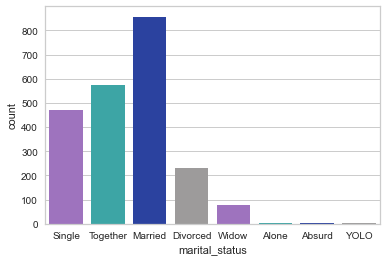

In [13]:
# We check column: "marital_status". 
#We can see 8 different classes
#We need to clean the "marital_status" values
pal = ["#A066CB", "#2CB6B6", "#1836B2","#9D9B9B"]
sns.countplot(x='marital_status', data=df,palette=pal)

In [14]:
df['marital_status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [16]:
df['marital_status']=df['marital_status'].replace({"Married": 'relationship', "Together": 'relationship', "Single": 'single', "Alone": 'single', "Divorced": 'single', "Widow": 'single', 'Absurd': "single", "YOLO": "single" })

In [17]:
df['marital_status'].value_counts()

relationship    1430
single           786
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'Total spent by marital status')

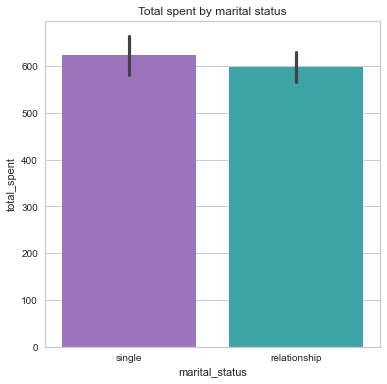

In [20]:
sns.set_palette(pal)
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=df["marital_status"],y=df["total_spent"])
#plt.legend(labels=['single', 'relationship'])
ax.set_title("Total spent by marital status")


According to our chart, single customers spent more than customer in relationship<br>
Although customer in relatinship is bigger

In [21]:
#calculate customer age using year of birth
df["age"] = 2021-df["year_birth"]

In [22]:
# we will have to deal with outliers in Age column
df["age"].max()

128

In [23]:
# We will calculate since when a customer is enrolled in the company's database
# First we nees to know the latest date registered in our data base:

df["dt_customer"].max()

Timestamp('2014-12-06 00:00:00')

In [24]:
#We calculate the number of days between 2 dates: 
df['last_date'] = '2014-12-06'
df['last_date'] = pd.to_datetime(df['last_date'])
df['regist_days'] = df['last_date'] - df['dt_customer']
df['regist_days'] = df['regist_days'].dt.days
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,total_spent,age,last_date,regist_days
0,5524,1957,Graduation,single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,1617,64,2014-12-06,971
1,2174,1954,Graduation,single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,27,67,2014-12-06,125
2,4141,1965,Graduation,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,776,56,2014-12-06,472
3,6182,1984,Graduation,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,53,37,2014-12-06,65
4,5324,1981,PhD,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,422,40,2014-12-06,321


In [25]:
# calculate the total number of purchases.

df["total_number_purchase"] = df["numwebpurchases"]+ df["numstorepurchases"]+df["numcatalogpurchases"]

<AxesSubplot:xlabel='education', ylabel='count'>

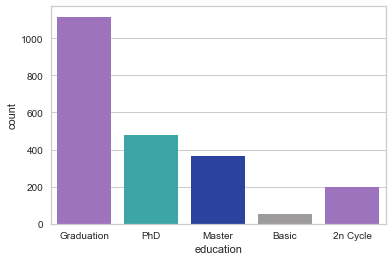

In [26]:
# We check column: "education". 
#We can see 5 different classes

sns.countplot(x='education', data=df,palette=pal )

In [27]:
#We will reduce the number of options:
df['education']=df['education'].replace({ "Graduation": 'graduate',"Basic": 'no_graduate',"Master": 'postgraduate', "2n Cycle": 'no_graduate', "PhD": 'postgraduate' })

In [28]:
df['education'].value_counts()

graduate        1116
postgraduate     846
no_graduate      254
Name: education, dtype: int64

88.54% of the customer are graduate<br>
11.46% of the customers have university studies <br>



In [29]:
df['kidhome'].value_counts()

0    1283
1     887
2      46
Name: kidhome, dtype: int64

In [30]:
df['teenhome'].value_counts()

0    1147
1    1018
2      51
Name: teenhome, dtype: int64

In [31]:
#" kidhome" and "teenhome" are very similar columns. 
#in this case we will sum them up in order to have a new column called "parent"

df["number_children"]=df['kidhome']+df['teenhome']

In [32]:
df['number_children'].value_counts()

1    1117
0     633
2     416
3      50
Name: number_children, dtype: int64

<AxesSubplot:xlabel='number_children', ylabel='count'>

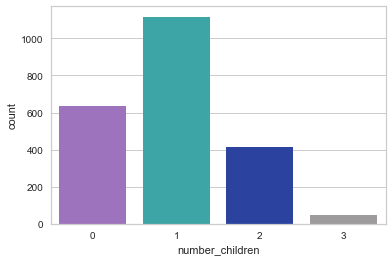

In [33]:

sns.countplot(x='number_children', data=df,palette=pal)

29,56% of the customers do not have children <br>
50.41% of the customers have 1 child<br>
18.77% of the customers have 2 children <br>
2.25% of the customers have 3 children






In [34]:
# parent will have 2 values: "1": when customer is parent, "0" when the customer is not parent
df["parent"] = np.where(df.number_children >0, '1', '0')


In [35]:
#We also wants to know the number of members per family. 
#In order to do that first we need to know if the customers are single parent or not.
df["number_parents"]=df["marital_status"]

In [36]:
df["number_parents"]

0             single
1             single
2       relationship
3       relationship
4       relationship
            ...     
2235    relationship
2236    relationship
2237          single
2238    relationship
2239    relationship
Name: number_parents, Length: 2216, dtype: object

In [37]:
df['number_parents']=df['number_parents'].replace({"single": 1, "relationship": 2})

In [38]:
# Once we know the number of parents we can calculate the number of members per family just adding the feature "number_children"
df["members_per_family"]=df['number_parents']+df['number_children']


In [39]:
#Creating a feature to get a sum of accepted promotions 
df["total_promos"] =  df["acceptedcmp1"]+ df["acceptedcmp2"]+ df["acceptedcmp3"]+ df["acceptedcmp4"]+ df["acceptedcmp5"]

In [40]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,total_spent,age,last_date,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos
0,5524,1957,graduate,single,58138.0,0,0,2012-04-09,58,635,...,1617,64,2014-12-06,971,22,0,0,1,1,0
1,2174,1954,graduate,single,46344.0,1,1,2014-08-03,38,11,...,27,67,2014-12-06,125,4,2,1,1,3,0
2,4141,1965,graduate,relationship,71613.0,0,0,2013-08-21,26,426,...,776,56,2014-12-06,472,20,0,0,2,2,0
3,6182,1984,graduate,relationship,26646.0,1,0,2014-10-02,26,11,...,53,37,2014-12-06,65,6,1,1,2,3,0
4,5324,1981,postgraduate,relationship,58293.0,1,0,2014-01-19,94,173,...,422,40,2014-12-06,321,14,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduate,relationship,61223.0,0,1,2013-06-13,46,709,...,1341,54,2014-12-06,541,16,1,1,2,3,0
2236,4001,1946,postgraduate,relationship,64014.0,2,1,2014-10-06,56,406,...,444,75,2014-12-06,61,15,3,1,2,5,1
2237,7270,1981,graduate,single,56981.0,0,0,2014-01-25,91,908,...,1241,40,2014-12-06,315,18,0,0,1,1,1
2238,8235,1956,postgraduate,relationship,69245.0,0,1,2014-01-24,8,428,...,843,65,2014-12-06,316,21,1,1,2,3,0


In [41]:
#we will drop the columns that we do not need anymore:
df.drop(columns=['year_birth',"kidhome","teenhome","dt_customer","last_date","acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5","complain","response","marital_status"],inplace=True)

In [42]:
df

,id,education,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos
0,5524,graduate,58138.0,58,635,88,546,172,88,88,...,7,1617,64,971,22,0,0,1,1,0
1,2174,graduate,46344.0,38,11,1,6,2,1,6,...,5,27,67,125,4,2,1,1,3,0
2,4141,graduate,71613.0,26,426,49,127,111,21,42,...,4,776,56,472,20,0,0,2,2,0
3,6182,graduate,26646.0,26,11,4,20,10,3,5,...,6,53,37,65,6,1,1,2,3,0
4,5324,postgraduate,58293.0,94,173,43,118,46,27,15,...,5,422,40,321,14,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,61223.0,46,709,43,182,42,118,247,...,5,1341,54,541,16,1,1,2,3,0
2236,4001,postgraduate,64014.0,56,406,0,30,0,0,8,...,7,444,75,61,15,3,1,2,5,1
2237,7270,graduate,56981.0,91,908,48,217,32,12,24,...,6,1241,40,315,18,0,0,1,1,1
2238,8235,postgraduate,69245.0,8,428,30,214,80,30,61,...,3,843,65,316,21,1,1,2,3,0


In [43]:
#We confirm the new columns have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2216 non-null   object 
 1   education              2216 non-null   object 
 2   income                 2216 non-null   float64
 3   recency                2216 non-null   int64  
 4   mntwines               2216 non-null   int64  
 5   mntfruits              2216 non-null   int64  
 6   mntmeatproducts        2216 non-null   int64  
 7   mntfishproducts        2216 non-null   int64  
 8   mntsweetproducts       2216 non-null   int64  
 9   mntgoldprods           2216 non-null   int64  
 10  numdealspurchases      2216 non-null   int64  
 11  numwebpurchases        2216 non-null   int64  
 12  numcatalogpurchases    2216 non-null   int64  
 13  numstorepurchases      2216 non-null   int64  
 14  numwebvisitsmonth      2216 non-null   int64  
 15  tota

## Correlation Matrix


In [44]:

#sns.pairplot(df)


In [45]:
#check the correlation matrix
df.corr()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,numstorepurchases,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,number_parents,members_per_family,total_promos
income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,...,0.529362,-0.553088,0.667576,0.161791,-0.016712,0.625755,-0.293352,0.004663,-0.240148,0.308381
recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,...,-0.000434,-0.018564,0.020066,0.016295,0.030777,0.007441,0.018290,-0.001371,0.014402,-0.013647
mntwines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,...,0.640012,-0.321978,0.893136,0.159451,0.148720,0.757320,-0.353748,-0.007244,-0.296388,0.510833
mntfruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,...,0.458491,-0.418729,0.613249,0.017747,0.059609,0.519319,-0.395901,-0.025988,-0.341154,0.157090
mntmeatproducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,...,0.486006,-0.539484,0.845884,0.033697,0.071345,0.634345,-0.504545,-0.023313,-0.429592,0.307190
mntfishproducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,...,0.457745,-0.446423,0.642371,0.040425,0.078033,0.536975,-0.427841,-0.017986,-0.363341,0.176111
mntsweetproducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,...,0.455225,-0.422371,0.607062,0.020204,0.076423,0.533585,-0.389411,-0.015948,-0.330482,0.201485
mntgoldprods,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,...,0.389180,-0.247691,0.528708,0.064208,0.144956,0.510195,-0.268918,-0.025442,-0.235846,0.196822
numdealspurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,...,0.066107,0.346048,-0.065854,0.058668,0.200666,0.116760,0.436076,0.026147,0.374464,-0.125727
numwebpurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,...,0.516240,-0.051226,0.528973,0.153051,0.172335,0.770534,-0.148871,0.003455,-0.121296,0.196823


<AxesSubplot:>

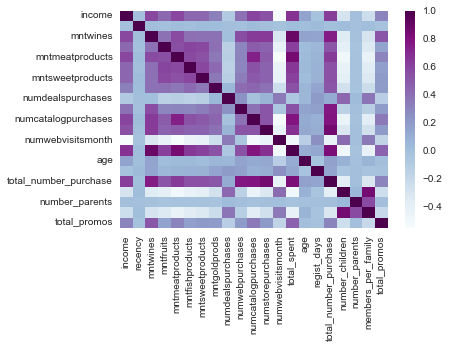

In [46]:
sns.heatmap(df.corr(),cmap ="BuPu")

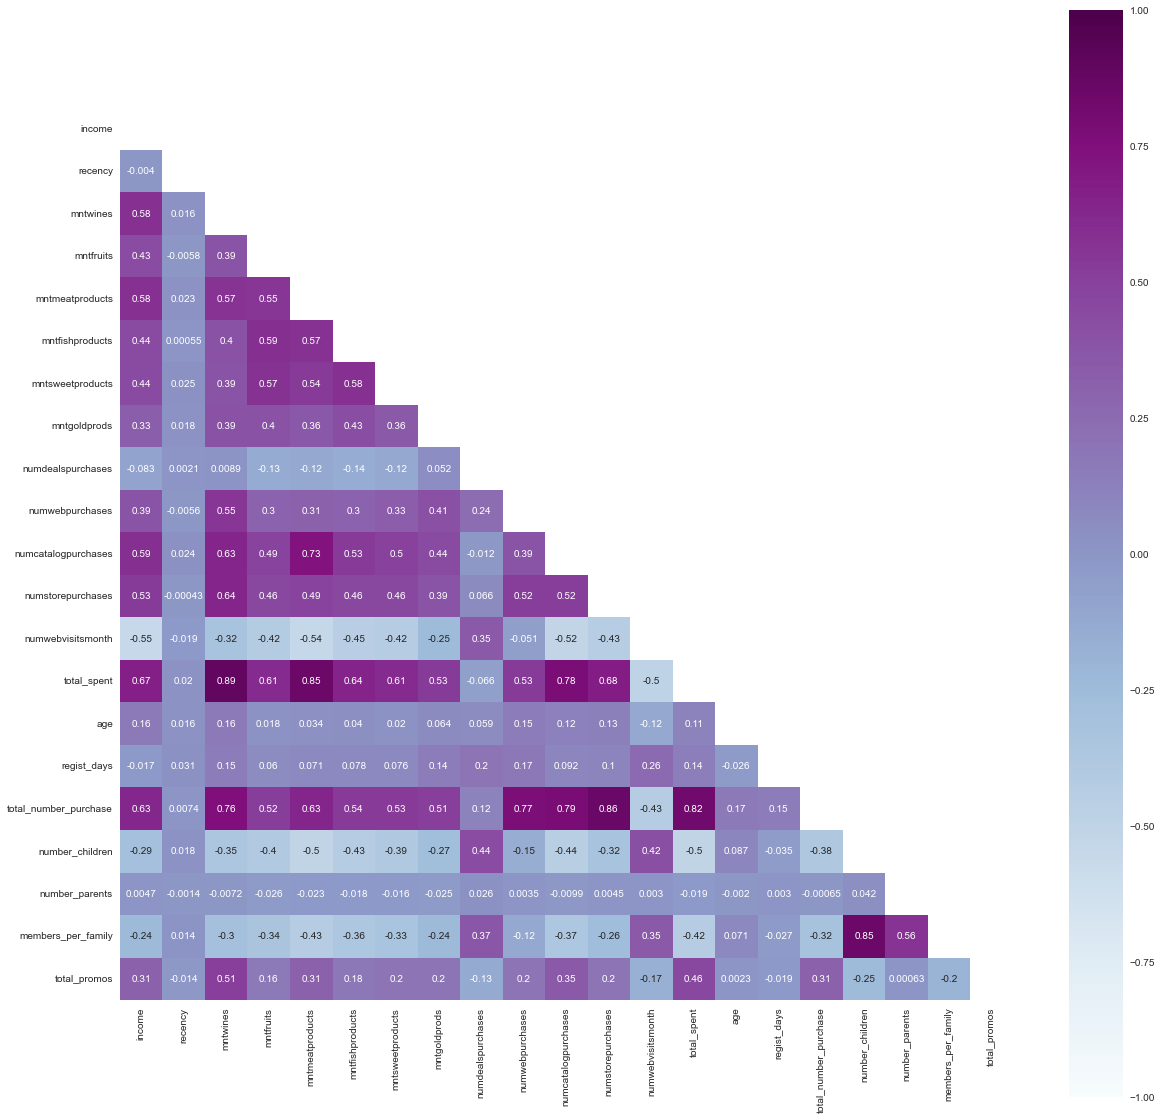

In [47]:
#Heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap = "BuPu", vmin=-1,vmax=1,annot=True, square=True)

We can see that some features are highly correlated with each other (>0,8). <br>
For example: "mntwine" and "mntmeatproduct" with "total_spent".<br>
Usually we would drop these columns, but they are be important to understand customer behaviour and pattern, so we will keep them. 


## Checking Outliers

In [48]:
X=df._get_numeric_data()
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,numstorepurchases,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,number_parents,members_per_family,total_promos
0,58138.0,58,635,88,546,172,88,88,3,8,...,4,7,1617,64,971,22,0,1,1,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,2,5,27,67,125,4,2,1,3,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,10,4,776,56,472,20,0,2,2,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,4,6,53,37,65,6,1,2,3,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,6,5,422,40,321,14,1,2,3,0


<AxesSubplot:>

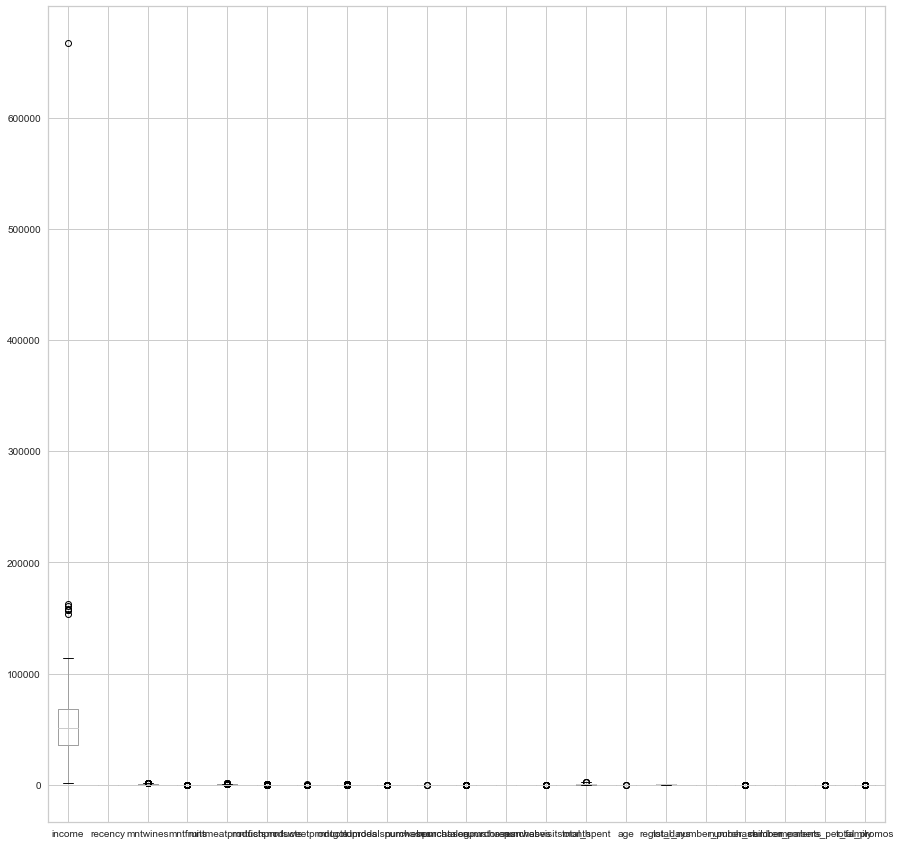

In [49]:
#Boxplot to detect outliers

X.boxplot(figsize=(15,15))

### Removing the outliers from Income

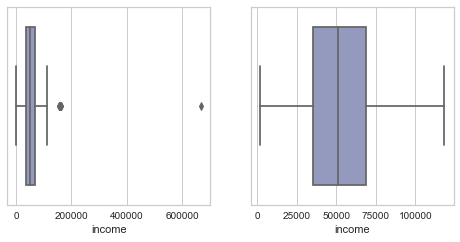

In [50]:
#we can see we have outliers in a few columns but since we have a small dataset only 2216, we will handle only outliers from "income" and "age"
outliers_removal("income")

In [51]:
df=df[df["income"]<600000]

### Removing the outliers from Age

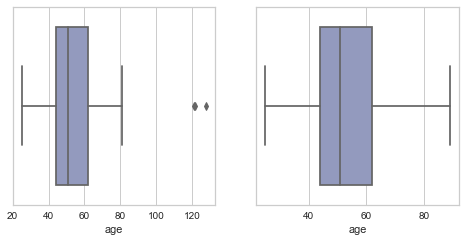

In [52]:
#we have a customer in dataset 128 years old, we remove these outlier from the age column 
outliers_removal("age")

In [53]:
df=df[df["age"]<100]

In [54]:
df["age"].max()

81

## RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the **recency**, **frequency** and **monetary** total of their recent transactions to identify the best customers and perform targeted marketing campaigns.<br>

The system assigns each customer numerical scores based on these factors to provide an objective analysis.<br>

What does it mean recency, freqency and monetary? <br>
**Recency**: Number of days since the customer's last purchase. Customers who recently made a purchase have higher probability to buy or use the same product again.<br>
**Frequency**. Number of total purchases made by the customer in the store.<br>
**Monetary**. Total spent of the customer in the store <br>

In [55]:
# In order to make the RFM analysis we will extract from our dataset the columns:
#"id","recency","total_purchase" and "total_spent"

rfm_df = df.filter(['id','recency','total_number_purchase','total_spent'], axis=1)

In [56]:
rfm_df

,id,recency,total_number_purchase,total_spent
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


In [57]:
# We rename the columns "total_spent" and "total_purchase" to keep the nomenclature of the RFM analysis.

rfm_df.columns = ['id', 'recency','frequency','monetary']

In [58]:
rfm_df

,id,recency,frequency,monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


In the RFM Analysis, we normally group customers into four groups based on the distribution of **recency**, **frequency**, and the **monetary** values.<br>

In order to create the customers segments, we will use **quartiles**. We will assign a score from 1 to 4 to **recency**, **frequency** and **monetary**. <br>

4 is the best/highest value, and 1 is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [59]:
#First we need the quartiles:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,24.0,6.00,69.0
0.50,49.0,12.00,397.0
0.75,74.0,18.25,1048.0


In [60]:
quantiles.to_dict()

{'recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 6.0, 0.5: 12.0, 0.75: 18.25},
 'monetary': {0.25: 69.0, 0.5: 397.0, 0.75: 1048.0}}

In [61]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [62]:
#create rfm segmentation table

rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [63]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
0,5524,58,22,1617,2,4,4,244
1,2174,38,4,27,3,1,1,311
2,4141,26,20,776,3,4,3,343
3,6182,26,6,53,3,1,1,311
4,5324,94,14,422,1,3,3,133


**Highest Recency score** = 4: most recently purchase. <br>
**Highest Frequency score** = 4: most quantity purchase.<br>
**Highest Monetary score** = 4: spent the most.<br>

In [64]:
#We can sort the dataframe based on "rfmscore" and see our most important customers

rfm_df.sort_values('rfmscore',ascending=False)

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
417,5067,11,20,1378,4,4,4,444
912,9760,24,25,1198,4,4,4,444
2049,2079,0,21,1208,4,4,4,444
1212,2324,12,29,1065,4,4,4,444
878,1446,12,27,1226,4,4,4,444
...,...,...,...,...,...,...,...,...
1088,5577,77,3,23,1,1,1,111
1131,606,87,3,15,1,1,1,111
1696,1890,95,3,25,1,1,1,111
1731,10304,77,4,60,1,1,1,111


In [65]:
rfm_df.to_csv("rfm_analysis.csv")

In [66]:
#We create labels

print("stars: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print('loyals: ',len(rfm_df[rfm_df['f_quartile']==4]))#Customers who buy the most often
print("big_spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))#Customers who have generated the most revenue
print('rookies: ', len(rfm_df[rfm_df['rfmscore']=='411']))# First time buyers on the store
print('at_risk: ',len(rfm_df[rfm_df['rfmscore']=='144']))#good past customers who haven't bought recently
print('lost: ',len(rfm_df[rfm_df['rfmscore']=='111']))

stars:  74
loyals:  553
big_spenders:  552
rookies:  134
at_risk:  90
lost:  141


**RFM ananlysys limitations**:

This technique does not include many factors that can be very important to fully understand our customers. For example it does not considerer factors such us age, education, marital status or behaviour in previos marketing campaings.





## Clustering

In [67]:
df

,id,education,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos
0,5524,graduate,58138.0,58,635,88,546,172,88,88,...,7,1617,64,971,22,0,0,1,1,0
1,2174,graduate,46344.0,38,11,1,6,2,1,6,...,5,27,67,125,4,2,1,1,3,0
2,4141,graduate,71613.0,26,426,49,127,111,21,42,...,4,776,56,472,20,0,0,2,2,0
3,6182,graduate,26646.0,26,11,4,20,10,3,5,...,6,53,37,65,6,1,1,2,3,0
4,5324,postgraduate,58293.0,94,173,43,118,46,27,15,...,5,422,40,321,14,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,61223.0,46,709,43,182,42,118,247,...,5,1341,54,541,16,1,1,2,3,0
2236,4001,postgraduate,64014.0,56,406,0,30,0,0,8,...,7,444,75,61,15,3,1,2,5,1
2237,7270,graduate,56981.0,91,908,48,217,32,12,24,...,6,1241,40,315,18,0,0,1,1,1
2238,8235,postgraduate,69245.0,8,428,30,214,80,30,61,...,3,843,65,316,21,1,1,2,3,0


In [68]:
#We do not need "id " anymore, so we drop it form the model. 
df = df.drop(columns = ['id'])

In [69]:
df

,education,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,...,numwebvisitsmonth,total_spent,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos
0,graduate,58138.0,58,635,88,546,172,88,88,3,...,7,1617,64,971,22,0,0,1,1,0
1,graduate,46344.0,38,11,1,6,2,1,6,2,...,5,27,67,125,4,2,1,1,3,0
2,graduate,71613.0,26,426,49,127,111,21,42,1,...,4,776,56,472,20,0,0,2,2,0
3,graduate,26646.0,26,11,4,20,10,3,5,2,...,6,53,37,65,6,1,1,2,3,0
4,postgraduate,58293.0,94,173,43,118,46,27,15,5,...,5,422,40,321,14,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,graduate,61223.0,46,709,43,182,42,118,247,2,...,5,1341,54,541,16,1,1,2,3,0
2236,postgraduate,64014.0,56,406,0,30,0,0,8,7,...,7,444,75,61,15,3,1,2,5,1
2237,graduate,56981.0,91,908,48,217,32,12,24,1,...,6,1241,40,315,18,0,0,1,1,1
2238,postgraduate,69245.0,8,428,30,214,80,30,61,2,...,3,843,65,316,21,1,1,2,3,0


### Converting categorical into numerical

The standard k-means algorithm is not  directly applicable to categorical data. We need to convert the categorical data into numerical. 
    

In [70]:
df["parent"] = pd.to_numeric(df["parent"], errors='coerce')

In [71]:
#Do we have categorical columns?
categorical_df=df.select_dtypes('object')

In [72]:
categorical_df

,education
0,graduate
1,graduate
2,graduate
3,graduate
4,postgraduate
...,...
2235,graduate
2236,postgraduate
2237,graduate
2238,postgraduate


In [73]:
categorical_df=pd.get_dummies(categorical_df, drop_first=True)

In [74]:
categorical_df

,education_no_graduate,education_postgraduate
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
2235,0,0
2236,0,1
2237,0,0
2238,0,1


In [75]:
X=df._get_numeric_data()

In [76]:
X=pd.concat([X, categorical_df], axis=1) 

### Scaler
We need to scale our numerical data. Please note that all the columns of our model are now mumerical. 

In [77]:
X

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos,education_no_graduate,education_postgraduate
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,971,22,0,0,1,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,125,4,2,1,1,3,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,472,20,0,0,2,2,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,65,6,1,1,2,3,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,321,14,1,1,2,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,54,541,16,1,1,2,3,0,0,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,75,61,15,3,1,2,5,1,0,1
2237,56981.0,91,908,48,217,32,12,24,1,2,...,40,315,18,0,0,1,1,1,0,0
2238,69245.0,8,428,30,214,80,30,61,2,6,...,65,316,21,1,1,2,3,0,0,1


There are 2 different scaler methods that we can use: <br>

1: StandarsScaler<br>
scaler = StandardScaler()<br>
scaler.fit(X)<br>
X_scaled = scaler.transform(X)<br>
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)<br>
display(X.head())<br>

2: MinMax <br>
from sklearn.preprocessing import MinMaxScaler <br>
scaler = MinMaxScaler()<br>
X_scaled = scaler.fit_transform(X)<br>
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)<br>
display(X.head())<br>


In [78]:
#We will use the 1 option: StandarsScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos,education_no_graduate,education_postgraduate
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,971,22,0,0,1,1,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,125,4,2,1,1,3,0,0,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,472,20,0,0,2,2,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,65,6,1,1,2,3,0,0,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,321,14,1,1,2,3,0,0,1


In [79]:
X_scaled_df.describe()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos,education_no_graduate,education_postgraduate
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,...,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,-1.146141e-16,-2.491979e-17,4.617564e-17,1.149372e-17,2.800653e-17,-1.736606e-17,-5.586249e-17,6.901251e-18,-2.652590e-16,-1.537599e-16,...,3.985159e-17,1.450517e-16,-9.616579e-17,3.553517e-17,-6.594082e-16,-8.271463e-17,1.972503e-16,8.156024e-17,5.068780e-16,-2.670157e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.333791e+00,-1.694030e+00,-9.052351e-01,-6.626279e-01,-7.449911e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01,-1.208163e+00,-1.491175e+00,...,-2.315280e+00,-2.202781e+00,-1.744484e+00,-1.264598e+00,-1.581139e+00,-1.349603e+00,-1.758359e+00,-4.391600e-01,-3.585686e-01,-7.862200e-01
25%,-7.771113e-01,-8.646302e-01,-8.340705e-01,-6.122946e-01,-6.736275e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01,-6.884322e-01,-7.616650e-01,...,-6.912026e-01,-7.404087e-01,-9.115896e-01,-1.264598e+00,-1.581139e+00,-1.349603e+00,-6.546443e-01,-4.391600e-01,-3.585686e-01,-7.862200e-01
50%,-2.731156e-02,-6.717941e-04,-3.848445e-01,-4.612945e-01,-4.416956e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01,-1.687011e-01,-3.215516e-02,...,-9.285849e-02,3.680820e-03,-7.869568e-02,6.998729e-02,6.324555e-01,7.409586e-01,4.490700e-01,-4.391600e-01,-3.585686e-01,-7.862200e-01
75%,7.679525e-01,8.632866e-01,5.921851e-01,1.678727e-01,2.908968e-01,2.255541e-01,1.449170e-01,2.335637e-01,3.510299e-01,6.973547e-01,...,8.473966e-01,7.477704e-01,7.889022e-01,6.998729e-02,6.324555e-01,7.409586e-01,4.490700e-01,-4.391600e-01,-3.585686e-01,1.271909e+00
max,5.131311e+00,1.727245e+00,3.521791e+00,4.345543e+00,6.948902e+00,4.042233e+00,5.719175e+00,5.359756e+00,6.587802e+00,8.357208e+00,...,2.471473e+00,2.369283e+00,2.697617e+00,2.739158e+00,6.324555e-01,7.409586e-01,2.656499e+00,5.448245e+00,2.788867e+00,1.271909e+00


### Scaled dataframe

In [80]:

X_scaled_df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,age,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos,education_no_graduate,education_postgraduate
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,...,1.018352,1.973583,1.309461,-1.264598,-1.581139,-1.349603,-1.758359,-0.439160,-0.358569,-0.786220
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,...,1.274785,-1.665144,-1.189221,1.404572,0.632456,-1.349603,0.449070,-0.439160,-0.358569,-0.786220
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,...,0.334530,-0.172664,1.031830,-1.264598,-1.581139,0.740959,-0.654644,-0.439160,-0.358569,-0.786220
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,...,-1.289547,-1.923210,-0.911590,0.069987,0.632456,0.740959,0.449070,-0.439160,-0.358569,-0.786220
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,...,-1.033114,-0.822130,0.198936,0.069987,0.632456,0.740959,0.449070,-0.439160,-0.358569,1.271909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,...,0.163575,0.124112,0.476567,0.069987,0.632456,0.740959,0.449070,-0.439160,-0.358569,-0.786220
2208,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,...,1.958607,-1.940414,0.337751,2.739158,0.632456,0.740959,2.656499,1.032691,-0.358569,1.271909
2209,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,...,-1.033114,-0.847936,0.754198,-1.264598,-1.581139,-1.349603,-1.758359,1.032691,-0.358569,-0.786220
2210,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,...,1.103830,-0.843635,1.170645,0.069987,0.632456,0.740959,0.449070,-0.439160,-0.358569,1.271909


### Principal Components


With this technique we will reduce the number of dimensions of our model


In [81]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_scaled_df)
reduced = pca.transform(X_scaled_df)


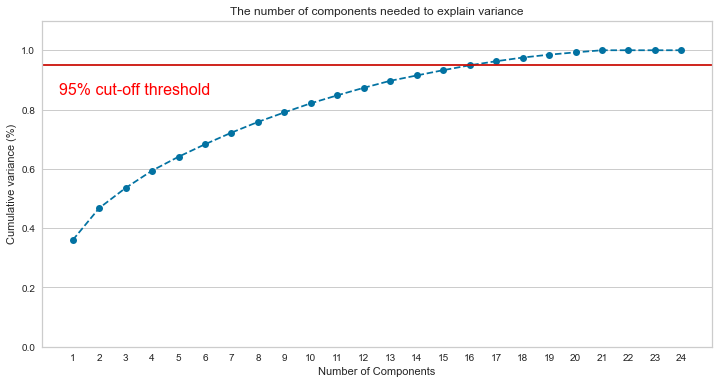

In [82]:
pca = PCA().fit(X_scaled_df)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 25, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()



According to the chart, 16 dimensions would explain 95% of the variance of the model. 
If we decide to follow, 80% rule, we will use 10 dimensions

In [83]:
#We calculate PCA with 16 dimensions:
pca = PCA(n_components=16)
pca.fit(X_scaled_df)
pca_df = pd.DataFrame(pca.transform(X_scaled_df), columns=[f"col{i}" for i in range(1,17)])
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,9.435892e-18,2.938393,-5.888406,-2.668733,-0.796446,2.515769,8.146789
col2,2212.0,1.907255e-17,1.609457,-4.489223,-1.099725,-0.177511,1.101266,5.661612
col3,2212.0,-3.613746e-18,1.278470,-3.636132,-0.901046,-0.053635,0.835724,4.907402
col4,2212.0,6.108234e-17,1.184844,-3.353060,-0.812677,-0.116696,0.831445,4.509599
col5,2212.0,4.282540e-17,1.059957,-3.193751,-0.695772,-0.015216,0.576411,4.824487
col6,2212.0,-3.334873e-17,1.004973,-2.133434,-0.850095,0.024414,0.841641,2.229150
col7,2212.0,7.217453e-17,0.970954,-2.869003,-0.648222,-0.065717,0.608431,3.592242
col8,2212.0,-1.535842e-17,0.930369,-2.835722,-0.677851,-0.122912,0.639635,3.593085
col9,2212.0,1.064047e-17,0.879505,-2.891234,-0.622132,0.038748,0.589276,3.133081
col10,2212.0,-2.715328e-17,0.859334,-6.333618,-0.535272,0.001725,0.523016,7.160603


In [84]:
pca_df.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PAC11','PAC12','PAC13','PAC14','PAC15','PAC16']

In [85]:
pca_df 

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PAC11,PAC12,PAC13,PAC14,PAC15,PAC16
0,4.895099,-0.284449,2.133987,1.662890,-1.082930,-0.686089,-1.416247,0.299014,1.637422,0.779804,0.144641,-0.103125,1.413870,0.665340,1.384903,0.483147
1,-2.935286,-0.602853,-1.294258,-0.302835,-1.700205,0.496051,1.477788,0.610215,1.078256,0.491733,0.225758,-0.392113,0.137378,0.066239,0.284095,-0.036761
2,2.463919,-0.529726,0.108903,-0.376940,-0.209189,0.964635,-0.919848,0.686878,-0.549025,-1.662379,-0.255250,-1.156523,0.047529,-0.482613,0.214764,0.870214
3,-2.857819,-1.027443,-0.300299,-1.131916,0.288604,1.067503,0.678337,-1.045950,-0.333295,-1.015789,0.348678,-0.545660,0.520885,-0.154104,0.044336,0.269756
4,-0.400494,1.046776,-0.493170,-0.636543,-0.299360,-1.195457,-0.065589,-1.525050,-1.452673,-0.113892,0.094240,0.498672,1.058027,-0.265110,-0.242608,0.038861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2.328804,1.701398,1.543405,-0.864222,-0.364226,0.187415,0.265451,0.000152,1.487418,-2.207482,-0.064322,1.798314,-0.492685,1.820314,0.104252,-1.128133
2208,-1.734990,4.434396,-2.200587,-0.806850,-0.021551,0.111885,1.534834,0.907950,-0.139845,0.308905,-0.018883,0.394451,1.975655,-0.141606,-0.011485,0.035753
2209,2.605635,-1.749542,-0.221399,1.594647,0.542309,-1.235337,1.454589,-0.575628,-0.895444,-0.632528,-0.142037,-1.354105,-0.255206,-1.915026,-0.575575,0.346980
2210,1.737405,1.509862,-1.594722,-0.869939,-0.706449,1.594121,-0.567309,0.440613,-0.695786,-0.290601,0.011969,0.373438,-0.393513,0.100402,0.099859,0.548111


In [86]:
#We need to understand what are the most important coefficients in each PCA
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(14, 'total_spent', 0.32), (17, 'total_number_purchase', 0.3), (1, 'income', 0.28), (5, 'mntmeatproducts', 0.28), (11, 'numcatalogpurchases', 0.28), (3, 'mntwines', 0.26), (12, 'numstorepurchases', 0.25), (6, 'mntfishproducts', 0.24), (7, 'mntsweetproducts', 0.23), (4, 'mntfruits', 0.23), (19, 'parent', -0.22), (18, 'number_children', -0.22), (13, 'numwebvisitsmonth', -0.21), (21, 'members_per_family', -0.19), (8, 'mntgoldprods', 0.19), (10, 'numwebpurchases', 0.18), (22, 'total_promos', 0.14), (9, 'numdealspurchases', -0.05), (15, 'age', 0.04), (16, 'regist_days', 0.03), (23, 'education_no_graduate', -0.03), (20, 'number_parents', -0.02), (2, 'recency', 0.0), (24, 'education_postgraduate', 0.0)]

Principal component  2
[(9, 'numdealspurchases', 0.43), (21, 'members_per_family', 0.39), (18, 'number_children', 0.36), (19, 'parent', 0.34), (10, 'numwebpurchases', 0.33), (17, 'total_number_purchase', 0.23), (3, 'mntwines', 0.19), (15, 'age', 0.19), (12, 'numstorepu

### K-means
First We need to calculate the number of optimal clusters for our model. 

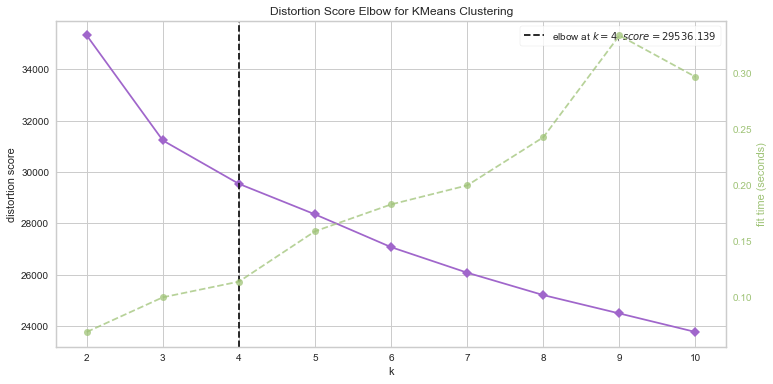

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, K = range(2, 21))
visualizer.fit(pca_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

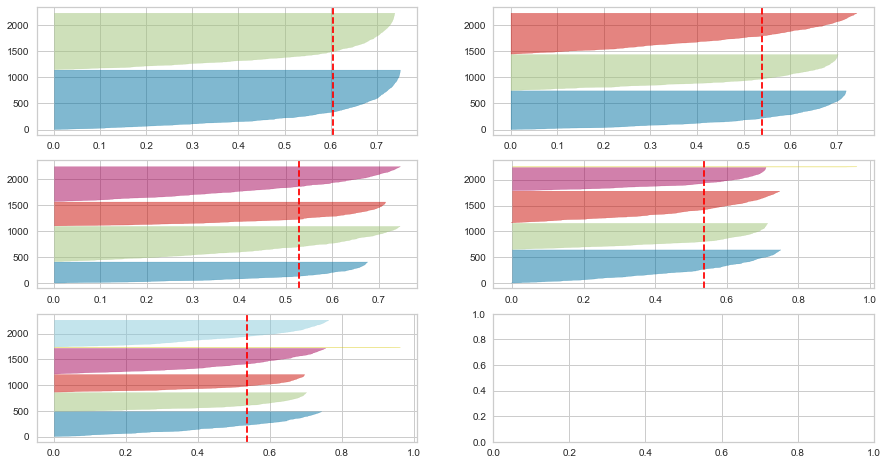

In [88]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [89]:
#Our optimal number of clusters are 4
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=1234)

In [90]:
len(kmeans.labels_)


2212

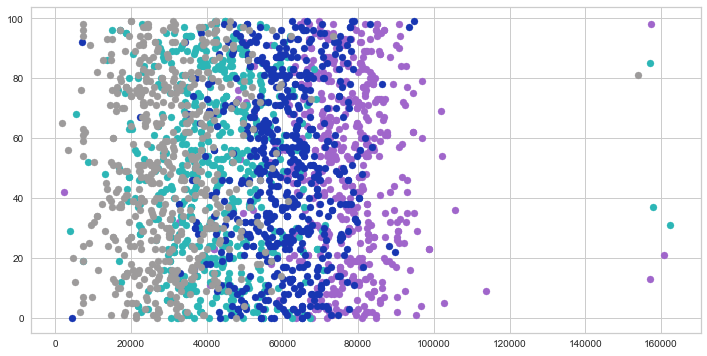

In [91]:
# assign a cluster to each example
labels = kmeans.predict(pca_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [92]:
# the number of elements per clusters: 
clusters = kmeans.predict(pca_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    513
1    587
2    572
3    540
dtype: int64

In [93]:
X["cluster"] = clusters
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,regist_days,total_number_purchase,number_children,parent,number_parents,members_per_family,total_promos,education_no_graduate,education_postgraduate,cluster
0,58138.0,58,635,88,546,172,88,88,3,8,...,971,22,0,0,1,1,0,0,0,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,125,4,2,1,1,3,0,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,472,20,0,0,2,2,0,0,0,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,65,6,1,1,2,3,0,0,0,3
4,58293.0,94,173,43,118,46,27,15,5,5,...,321,14,1,1,2,3,0,0,1,2


In [94]:
pca_df["cluster"]=clusters

In [95]:
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PAC11,PAC12,PAC13,PAC14,PAC15,PAC16,cluster
0,4.895099,-0.284449,2.133987,1.662890,-1.082930,-0.686089,-1.416247,0.299014,1.637422,0.779804,0.144641,-0.103125,1.413870,0.665340,1.384903,0.483147,0
1,-2.935286,-0.602853,-1.294258,-0.302835,-1.700205,0.496051,1.477788,0.610215,1.078256,0.491733,0.225758,-0.392113,0.137378,0.066239,0.284095,-0.036761,1
2,2.463919,-0.529726,0.108903,-0.376940,-0.209189,0.964635,-0.919848,0.686878,-0.549025,-1.662379,-0.255250,-1.156523,0.047529,-0.482613,0.214764,0.870214,0
3,-2.857819,-1.027443,-0.300299,-1.131916,0.288604,1.067503,0.678337,-1.045950,-0.333295,-1.015789,0.348678,-0.545660,0.520885,-0.154104,0.044336,0.269756,3
4,-0.400494,1.046776,-0.493170,-0.636543,-0.299360,-1.195457,-0.065589,-1.525050,-1.452673,-0.113892,0.094240,0.498672,1.058027,-0.265110,-0.242608,0.038861,2


### Insight per cluster

In order to analyze the characteristic of our cluster we will use bar charts, box plots<br> and new kind of chart called boxen plots <br>

If you need to know more about boxenplots please check this link from seanborn: [boxenplots](https://seaborn.pydata.org/generated/seaborn.boxenplot.html?highlight=boxenplot#seaborn.boxenplot)



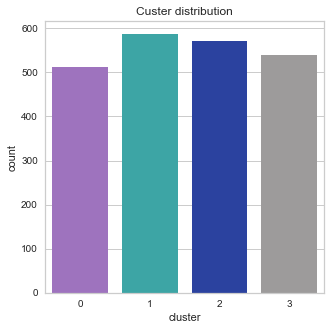

In [96]:
pal = ["#A066CB", "#2CB6B6", "#1836B2","#9D9B9B"]

fig,ax=plt.subplots(figsize=(5,5))
pl = sns.countplot(x=X["cluster"], palette=pal)
pl.set_title("Custer distribution")

plt.show()


The clusters seem to be fairly distributed, there are almost difference among them

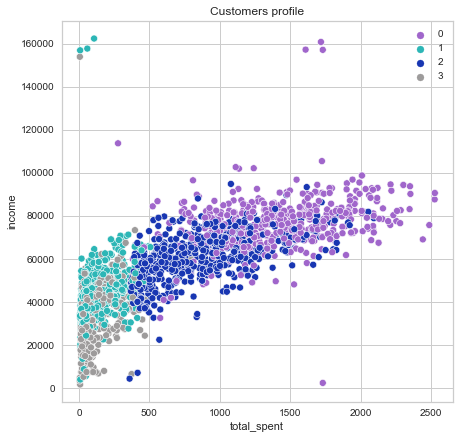

In [97]:
fig,ax=plt.subplots(figsize=(7,7))
pl = sns.scatterplot(x=X["total_spent"], y=X["income"],hue=X["cluster"],palette= pal)
pl.set_title("Customers profile")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern <br>

cluster 0: high spent (between 1000 and 2500) & high income (big spenders) <br> 
cluster 1: medium spent (between 500 and 1000) and medium income <br>
cluster 2: low spent (<500) & intermediate income <br>
cluster 3: low spent (<500) & low income <br>




#### Total spent distribution

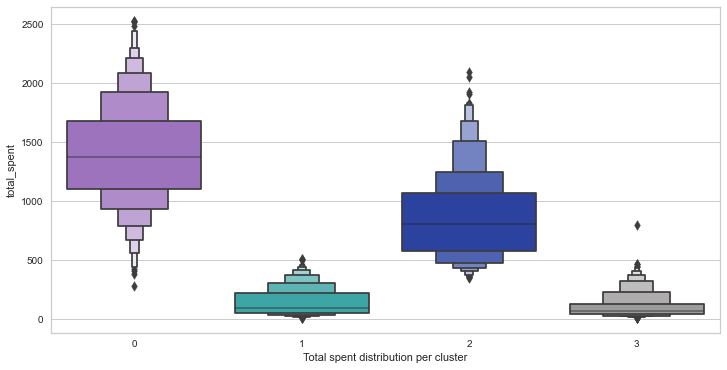

In [98]:
plt.figure()
pl=sns.boxenplot(x=X["cluster"], y=X["total_spent"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["total_spent"], palette=pal)
pl.set_xlabel("Total spent distribution per cluster")
plt.show()

We can see that customers from cluster 0 spent the most, followed by cst from cluster 2.  <br>
Customer from cluster 3 


#### Total number of purchases

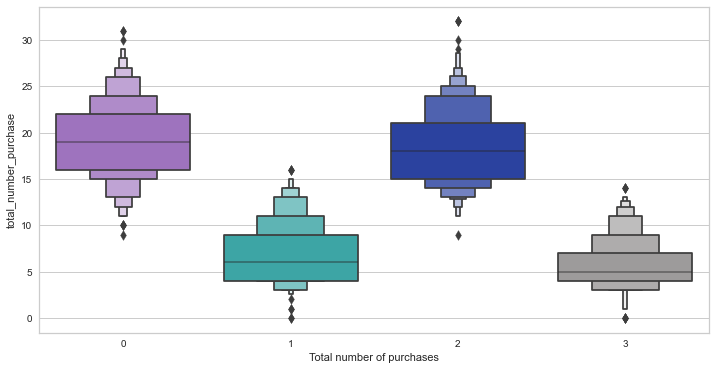

In [99]:
plt.figure()
#pl=sns.swarmplot(x=X["cluster"], y=X["recency"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=X["cluster"], y=X["total_number_purchase"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["total_number_purchase"], palette=pal)
pl.set_xlabel("Total number of purchases")
plt.show()

Customers from clusters 0 and 2 purchase the most <br>
Cst from cluster 5 make the lowest number of purchases

 

#### Number Of Total Accepted Promotions

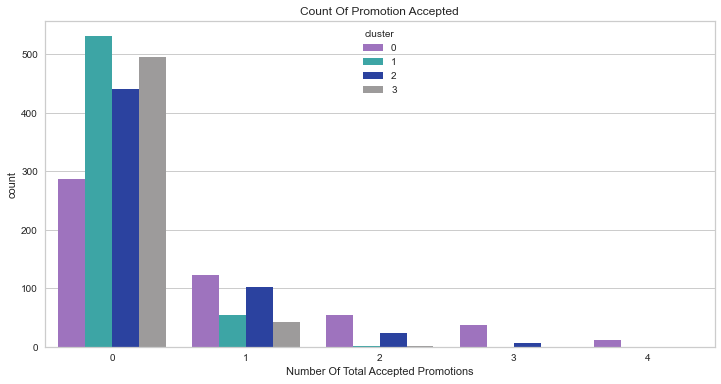

In [100]:

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["total_promos"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Promotions are not effective.<br> 
The initial promotion was very effective,specially for cst of cluster 1 and 4 ( clusters wit lowest income).<br>
Customer from cluster 0 showed some interest to the first promotion(customer with highest income).  <br>
Customers from cluster 2 have a very positive reaction to the promotion, equivalent to clusters 1 and 4. Although customer from this cluster have highest income.  . <br>
However, The rest of promotions were less and less effective until promotion number 5, where almost no one participated. <br>

#### Total number of deal purchases

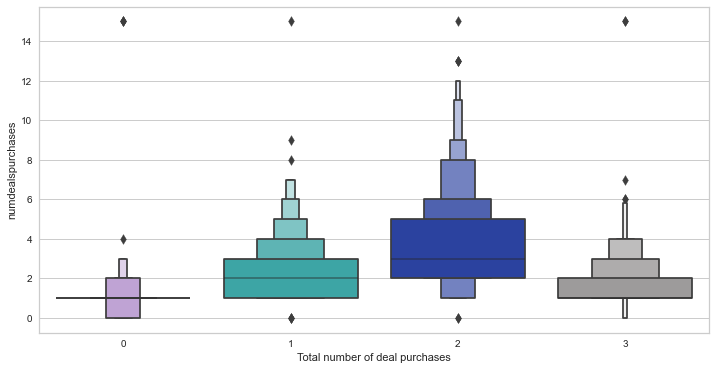

In [101]:
plt.figure()
pl=sns.boxenplot(x=X["cluster"], y=X["numdealspurchases"], palette=pal)
#pl = sns.boxplot(x=X["cluster"], y=X["total_spent"], palette=pal)
pl.set_xlabel("Total number of deal purchases")
plt.show()

Although promotions are not working wery well, customers have a positive reaction to deals. <br>
customer from cluster 0, 4 react positively to deals <br>
However customer from cluster 2 and 3, the one with highest income, do not react to deals

#### Number of online purchases

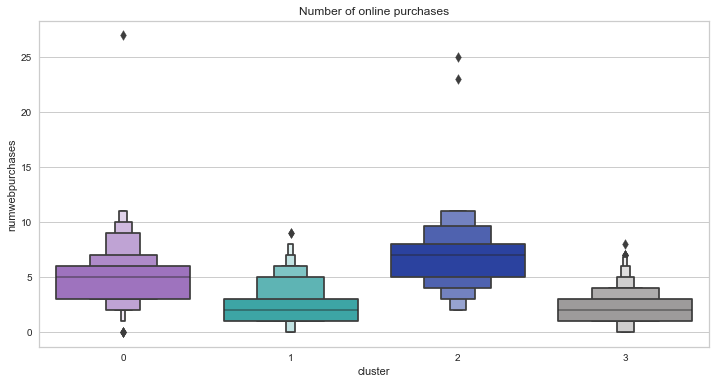

In [102]:
plt.figure()
pl=sns.boxenplot(y=X["numwebpurchases"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["numwebpurchases"], palette=pal)
pl.set_title("Number of online purchases")
plt.show()

Online shopping still is a pending task for the store.<br>
We can see that cst form cluster 2 are leaders in online shopping although is a very small representation

#### Number of store purchases

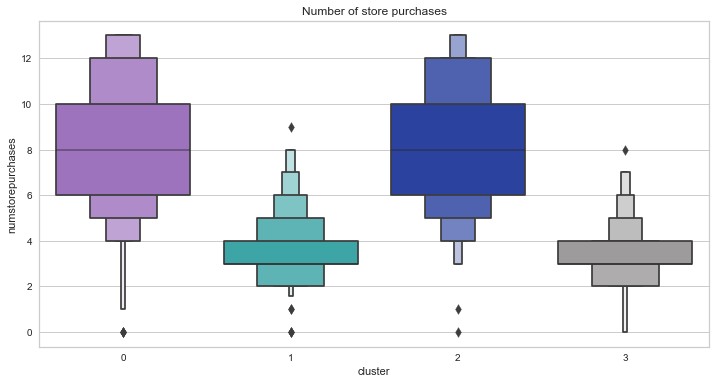

In [103]:
plt.figure()
pl=sns.boxenplot(y=X["numstorepurchases"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["numwebpurchases"], palette=pal)
pl.set_title("Number of store purchases")
plt.show()

Customers prefers buying at the store. 
We can see that customers from clusters 0 and 2 buy more at the store. <br>
  

#### Customer's age

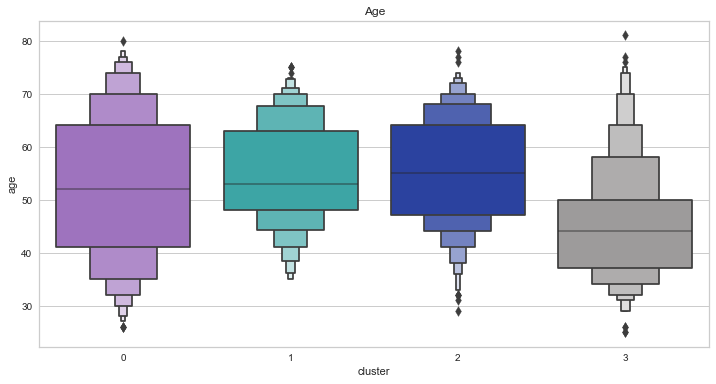

In [104]:
plt.figure()
pl=sns.boxenplot(y=X["age"],x=X["cluster"], palette= pal)
#pl = sns.boxplot(x=X["cluster"], y=X["age"], palette=pal)
pl.set_title("Age")
plt.show()

customers from cluster 3 are the youngest

#### product spent distribution

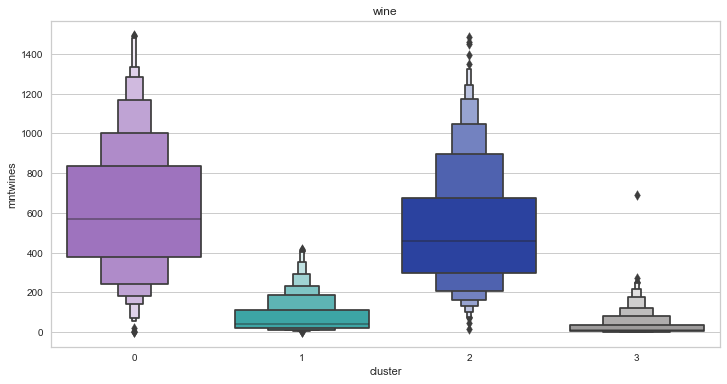

In [105]:
plt.figure()
pl=sns.boxenplot(y=X["mntwines"],x=X["cluster"], palette= pal)
pl.set_title("wine")
plt.show()

Customers from clusters 0 and 2 have the highest spent in wine. <br>


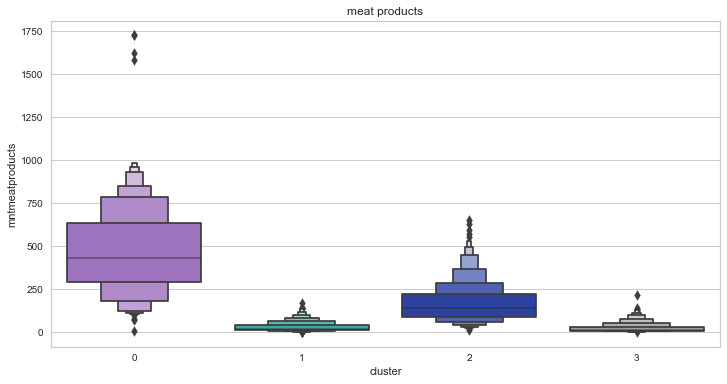

In [106]:
plt.figure()
pl=sns.boxenplot(y=X["mntmeatproducts"],x=X["cluster"], palette= pal)
pl.set_title("meat products")
plt.show()

Same pattern.

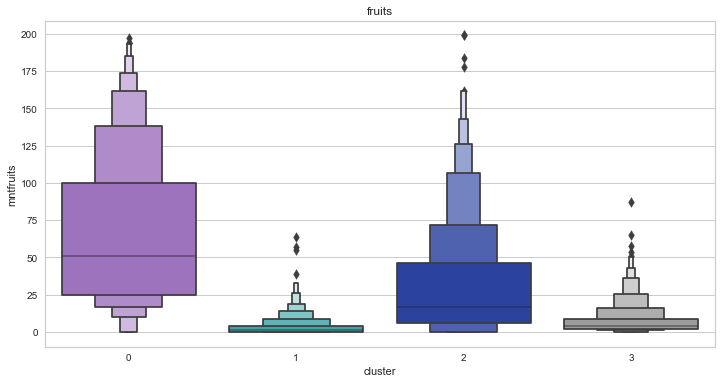

In [107]:
plt.figure()
pl=sns.boxenplot(y=X["mntfruits"],x=X["cluster"], palette= pal)
pl.set_title("fruits")
plt.show()

same pattern

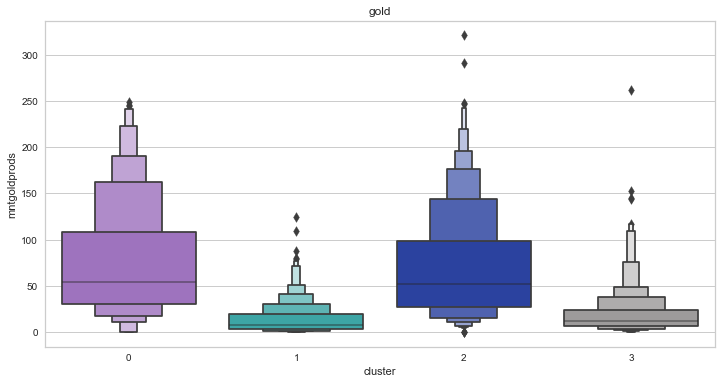

In [108]:
plt.figure()
pl=sns.boxenplot(y=X["mntgoldprods"],x=X["cluster"], palette= pal)
pl.set_title("gold")
plt.show()

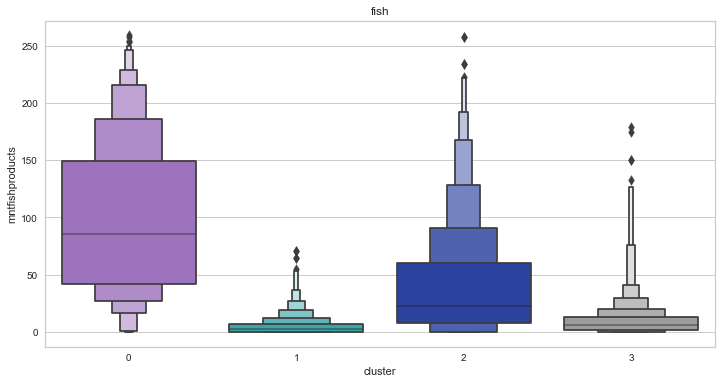

In [109]:
plt.figure()
pl=sns.boxenplot(y=X["mntfishproducts"],x=X["cluster"], palette= pal)
pl.set_title("fish")
plt.show()

same pattern

#### Days since customer is registered as customer

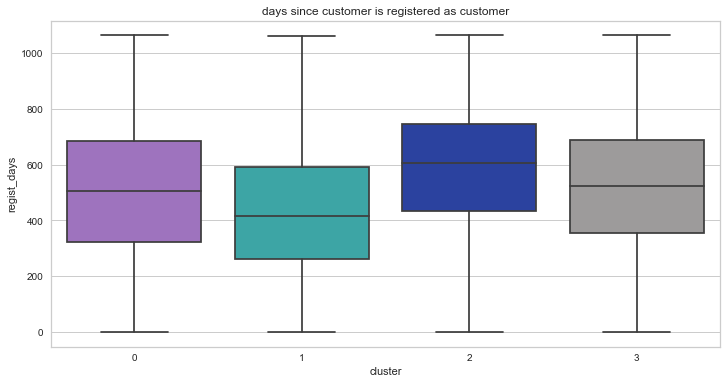

In [110]:
plt.figure()
#pl=sns.boxenplot(y=X["parent"],x=X["cluster"], palette= pal)
pl = sns.boxplot(x=X["cluster"], y=X["regist_days"], palette=pal)
pl.set_title("days since customer is registered as customer")
plt.show()

Cst from cluster 2 and 0 are the oldest clients
Cst from cluster 1 are the youngest clients. 

#### Number of children

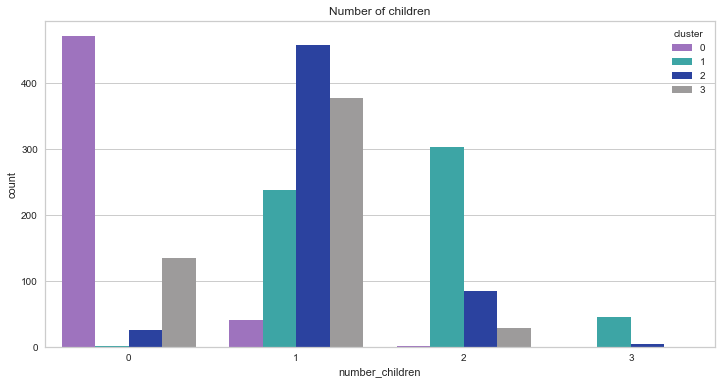

In [111]:
plt.figure()
pl = sns.countplot(x=df["number_children"],hue=X["cluster"], palette= pal)
pl.set_title("Number of children")

plt.show()

Most of the customer from cluster 0 does not have children. <br> 
Cst from cluster 1 have between 1-3 child <br>
Mayority of the customer from cluster 2 have 1 child, although a few have 2
Customer from cluster 3 have between 0 and 2 children. 



#### Members per family

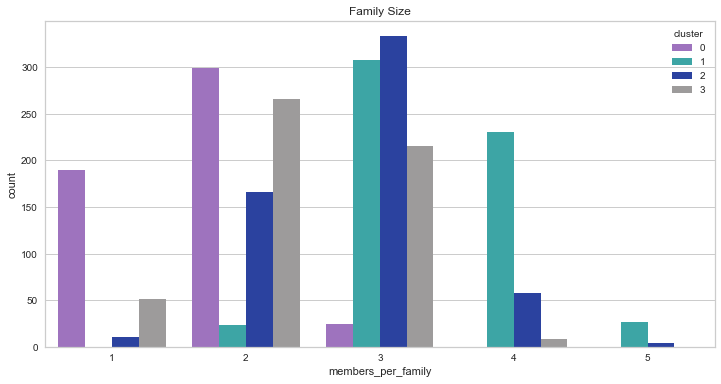

In [112]:
plt.figure()
pl = sns.countplot(x=df["members_per_family"],hue=X["cluster"], palette= pal)
pl.set_title("Family Size")
plt.show()

Mayority of the customes form cluster 0 live with his partner although there is a big group of single. <br>
customer from cluster 1 have famiy of 3-5 members. (2 parents- 1-3 children)<br>
customer from cluster 2 have family of 2-4 members<br>
Customer from cluster 3 have family of 1-3 members. 

#### Numbers of days since customer is registered as customer

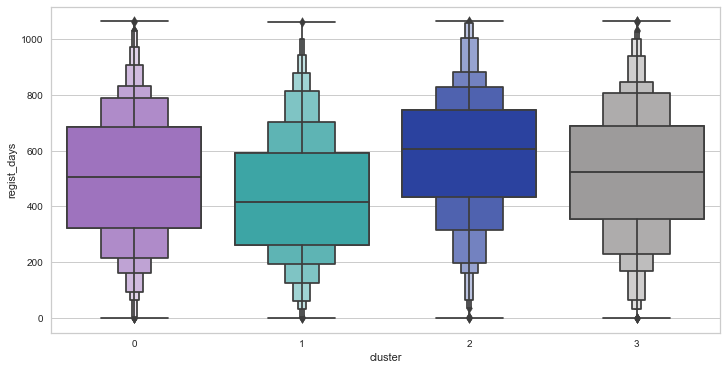

In [113]:
plt.figure()
pl=sns.boxenplot(y=X["regist_days"],x=X["cluster"], palette= pal)
pl = sns.boxplot(x=X["cluster"], y=X["regist_days"], palette=pal)

plt.show()
pl.set_title("days since customer is registered as customer")
plt.show()

#### Parent?

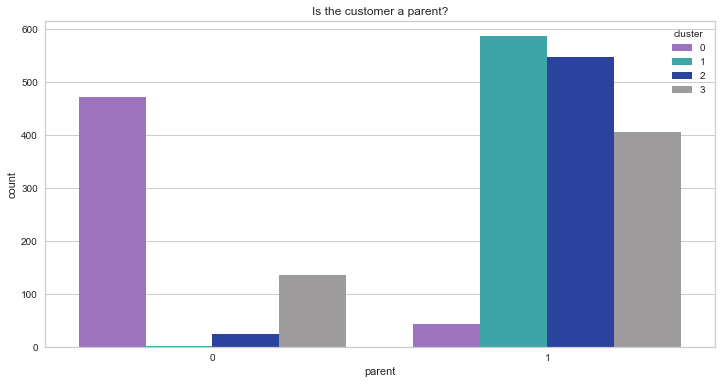

In [114]:
plt.figure()
pl = sns.countplot(x=df["parent"],hue=X["cluster"], palette= pal)
pl.set_title("Is the customer a parent?")
plt.show()



Mayority of customers from cluster 0 does not have children. 
Customers from cluster 1 are parents
mayority of customers from cluster 1 are parents
mayority of customers form cluster 3 are parents too

#### Final conclusions per clusters

What we know so far: <br>

**cluster 0**:<br>
        1.Highest purchasing power<br>
        2.Age between 51-52 years old<br>
        3.Living with a partner and have no children.<br>
        4.Singles fall into this cluster<br>
        5.Consume wine the most.<br>
        6.They purchase mostly in store, but are the second most important group for online shopping.<br>
        7.No interest in promotions or discounts.<br>
        
**cluster 1**:<br>
        1.Median purchasing power but very low spent.<br>
        2.Age between 52-54 years old<br>
        3.Parents with 3-5 family memb. 2nd highest consumers of wine.<br>
        4.Buy mostly in store.<br>
        5.React to discounts actively, but not to promotions.<br>
        
**cluster 2**:<br>
        1.2nd highest purchasing power.<br>
        2.Mostly in their 50s.<br>
        3.Parent with 2-3 family memb.<br>
        4.Wine, fruits and gold are the products they buy a lot.<br>
        5.They buy the biggest amount of gold.<br>
        6.The most important group for online shopping, still the majority shops in store. Biggest cluster for shopping with discount.<br>
        
**cluster 3**: . <br>
        1.Smallest purchasing power.<br>
        2.Mostly in their 40s.<br>
        3.Living with a partner<br>
        4.Family members 2-3<br>
        5.Singles with children as well.<br>
        6.Prefer shopping in store, smallest group for online shop<br>
        7.They do not engage much with discounts.<br>


        

    